In [46]:
import numpy as np
import networkx as nx
from scipy.special import gammaln
import matplotlib.pyplot as plt
import pdb
import importlib

In [47]:
import optim
import sparsedense as spd

In [48]:
importlib.reload(optim)
importlib.reload(spd)

<module 'sparsedense' from 'C:\\Github\\sparsedense3\\nips\\sparsedense.py'>

In [49]:
links = np.genfromtxt('nips.tsv', delimiter='\t', dtype=int)
g = nx.Graph()
g.add_edges_from(links)
net = nx.adjacency_matrix(g).toarray().astype(int)
for i in range(net.shape[0]):
    net[i, i] = 1

In [50]:
alpha0 = 3.
sigma0 = .95
c0 = 25.
lamb0 = 2000.

model = spd.NetworkFull(net, links, alpha=alpha0, sigma=sigma0, c=c0, lamb=lamb0)

In [51]:
model.clique_init()

(1589, 2715)


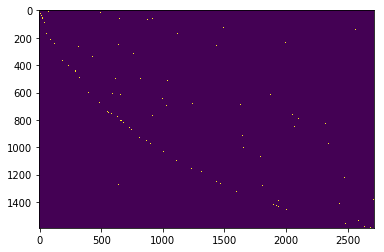

In [52]:
Z = model.Z
print(Z.shape)
plt.imshow(Z, aspect = 'auto')
plt.show()

In [ ]:
est_alpha, est_sigma, est_c = optim.optimize_hypers(
    model.Z, model.alpha, model.sigma, model.c, momentum = 0.,
    num_iters = 20000, print_every = 100, h = 1e-8)

iter      0: alpha:      3.000, sigma: 0.950, c:   25.000, ll: -16336.821, grad:   -449.340, -16118.759,     -3.102, step: 2.2517998136852506e-05
iter      1: alpha:      2.990, sigma: 0.587, c:   25.000, ll: -16080.625, grad:    456.497,   5323.062,     22.775, step: 5.4187310716521876e-05
iter    101: alpha:      3.315, sigma: 0.765, c:   25.012, ll: -15442.934, grad:     56.704,    183.271,      2.421, step: 4.876793469430461e-05
iter    201: alpha:      3.498, sigma: 0.757, c:   25.021, ll: -15435.882, grad:     32.189,     75.186,      1.460, step: 5.4863200971302323e-05
iter    301: alpha:      3.615, sigma: 0.751, c:   25.028, ll: -15433.183, grad:     20.969,     52.965,      1.488, step: 4.937622787899669e-05
iter    401: alpha:      3.692, sigma: 0.747, c:   25.035, ll: -15432.006, grad:     14.102,     37.369,      1.218, step: 5.5547521754013877e-05
iter    501: alpha:      3.744, sigma: 0.744, c:   25.042, ll: -15431.469, grad:     10.066,     33.664,      1.419, step: 4.9

In [ ]:
est_alpha, est_sigma, est_c = optim.optimize_hypers(
    model.Z, model.alpha, model.sigma, model.c, momentum = 0.25,
    num_iters = 20000, print_every = 100, h = 1e-4)